

# GANs - Generative Adverserial Networks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


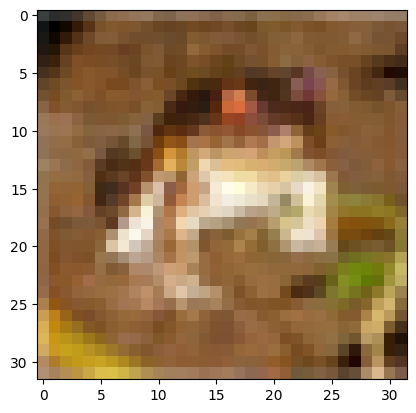

In [4]:
plt.imshow(X_train[0])

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Filtering out the Data for Faster Training on Smaller Dataset

In [6]:
#only_zeros = X_train[y_train==0]
only_zeros = X_train

In [7]:
#only_zeros.shape

In [8]:
#plt.imshow(only_zeros[650])

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [11]:
generator = Sequential()
generator.add(Dense(100, activation="relu", input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(3072, activation="sigmoid")) # 28*28 = 784
generator.add(Reshape([32,32, 3]))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[32,32, 3]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation="sigmoid"))

discriminator.compile(loss="binary_crossentropy", optimizer="adam")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
GAN = Sequential([generator, discriminator])

In [14]:
discriminator.trainable = False

In [15]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [16]:
GAN.layers

[<Sequential name=sequential, built=True>,
 <Sequential name=sequential_1, built=True>]

In [17]:
GAN.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │       489,122 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       476,151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 965,273 (3.68 MB)

 Trainable params: 489,122 (1.87 MB)

 Non-trainable params: 476,151 (1.82 MB)

In [18]:
GAN.layers[0].summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 150)            │        15,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3072)           │       463,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 32, 32, 3)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489,122 (1.87 MB)

 Trainable params: 489,122 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
GAN.layers[1].summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 150)            │       460,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 476,151 (1.82 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 476,151 (1.82 MB)

### Setting up Training Batches

In [20]:
import tensorflow as tf

In [37]:
batch_size = 128



The buffer_size in Dataset.shuffle() can affect the randomness of your dataset, and hence the order in which elements are produced.

In [38]:
# my_data = X_train
my_data = only_zeros

In [39]:
# import tensorflow as tf

# # Build the dataset
# my_data = [1, 2, 3, 4]
# dataset = tf.data.Dataset.from_tensor_slices(my_data)


# # Or item-by-item
# for i, item in enumerate(dataset):
#     print(f"item[{i}] =", item.numpy())

In [40]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [41]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [42]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [50]:
epochs = 5

**NOTE: The generator never actually sees any real images. It learns by viewing the gradients going back through the discriminator. The better the discrimnator gets through training, the more information the discriminator contains in its gradients, which means the generator can being to make progress in learning how to generate fake images, in our case, fake zeros.**

## Training Loop

In [51]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################

        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])

        # Generate numbers based just on noise input
        gen_images = generator(noise)

        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)

        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

        # This gets rid of a Keras warning
        discriminator.trainable = True

        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)


        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################

        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])

        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)

        # Avois a warning
        discriminator.trainable = False

        GAN.train_on_batch(noise, y2)

print("TRAINING COMPLETE")

Currently on Epoch 1
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Currently on Epoch 2
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Currently on Epoch 3
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Currently on Epoch 4
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
Currently on Epoch 5
	Currently on batch number 100 of 390
	Currently on batch number 200 of 390
	Currently on batch number 300 of 390
TRAINING COMPLETE


In [29]:
# Most likely your generator will only learn to create one type of noisey zero
# Regardless of what noise is passed in.

In [52]:
noise = tf.random.normal(shape=[10, codings_size])

In [53]:
noise.shape

TensorShape([10, 100])

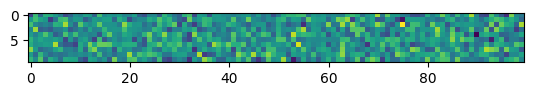

In [54]:
plt.imshow(noise)

In [55]:
image = generator(noise)

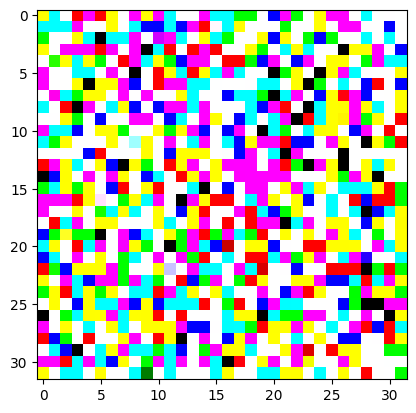

In [56]:
plt.imshow(image[5])